In [1]:
import pandas as pd

In [2]:
cupid_data = pd.read_csv('okcupid_profiles.csv')

In [3]:
cupid_data.shape

(59946, 31)

In [4]:
cupid_data[1:5]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


## Model 1
Inputs age, gender, orientation.

In [5]:
m1 = cupid_data[['age','status','sex','orientation']]
m1_copy = m1

In [6]:
import matplotlib.pyplot as plt

/var/folders/0v/zwq30gqn6zv99xpkxv2fzs6w0000gn/T/ipykernel_68803/3525971256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1_copy['age'] = pd.cut(m1_copy['age'], bins=bins, labels=labels)


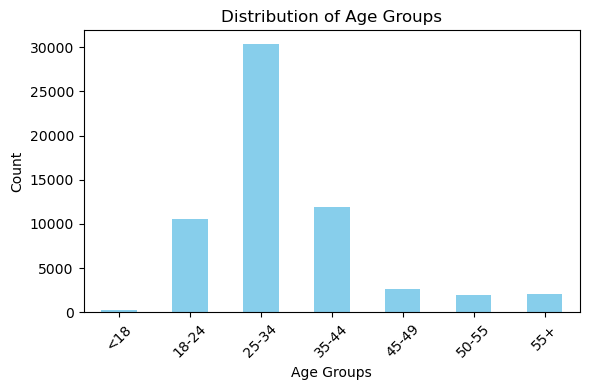

In [7]:
bins = [0, 18, 24,34, 44,49,55, float('inf')]  # Define the age bins
labels = ['<18', '18-24', '25-34', '35-44','45-49', '50-55','55+']  # Labels for the age groups

# Create a new column 'Age Group' based on the defined bins and labels
m1_copy['age'] = pd.cut(m1_copy['age'], bins=bins, labels=labels)

# Count the number of individuals in each age group
age_group_counts = m1_copy['age'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(6, 4))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
m1_copy['age'].describe()

count     59946
unique        7
top       25-34
freq      30397
Name: age, dtype: object

In [9]:
m1_copy['sex'].describe()

count     59946
unique        2
top           m
freq      35829
Name: sex, dtype: object

In [10]:
Te = m1_copy['sex'].isnull().sum()

In [11]:
print(Te) #No missing values

0


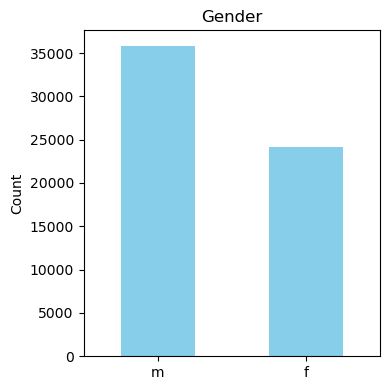

In [12]:
count = m1_copy['sex'].value_counts()
plt.figure(figsize = (4,4))
count.plot(kind='bar',color = 'skyblue')
plt.title('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
count = m1_copy['orientation'].isnull().sum()
print(count)#Nonull values

0


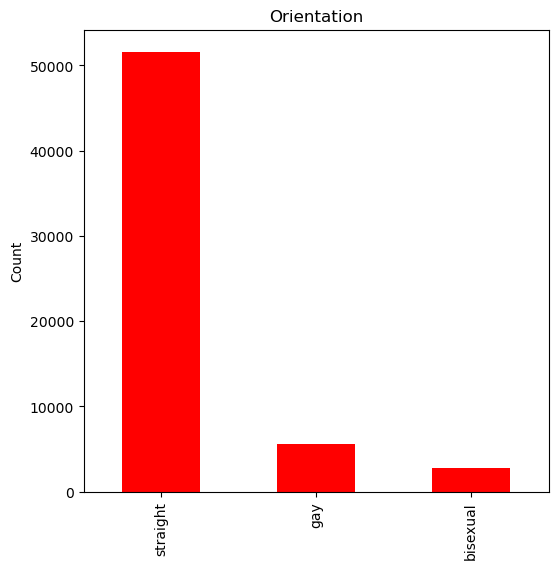

In [14]:
o_count = m1_copy['orientation'].value_counts()
plt.figure(figsize=(6,6))
o_count.plot(kind='bar',color = 'red')
plt.title('Orientation')
plt.ylabel('Count')
plt.show()

In [15]:
#model 1
def gender_desired(sex ='m',orientation='straight'):
    if (sex == 'm' and orientation == 'straight') or (sex == 'f' and orientation == 'gay'):
        return 'female'
    elif (sex=='m' and orientation == 'gay') or (sex == 'f' and orientation == 'straight'):
            return 'male'
        
    else:
        return 'both'
            
        

In [16]:
gender_desired('m','gay')

'male'

In [17]:
#model 2 get the body type.
cupid_data['body_type'].describe()

count       54650
unique         12
top       average
freq        14652
Name: body_type, dtype: object

In [18]:
m2 = cupid_data[['age','sex','location','body_type']]

In [19]:
m2[1:5]

,age,sex,location,body_type
1,35,m,"oakland, california",average
2,38,m,"san francisco, california",thin
3,23,m,"berkeley, california",thin
4,29,m,"san francisco, california",athletic


In [20]:
m2['City'] = m2['location'].str.split(', ', expand=True)[0]  # Extracting city
m2['State'] = m2['location'].str.split(', ', expand=True)[1]  # Extracting state


/var/folders/0v/zwq30gqn6zv99xpkxv2fzs6w0000gn/T/ipykernel_68803/2201194363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2['City'] = m2['location'].str.split(', ', expand=True)[0]  # Extracting city
/var/folders/0v/zwq30gqn6zv99xpkxv2fzs6w0000gn/T/ipykernel_68803/2201194363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2['State'] = m2['location'].str.split(', ', expand=True)[1]  # Extracting state


In [21]:
m2[1:5]

,age,sex,location,body_type,City,State
1,35,m,"oakland, california",average,oakland,california
2,38,m,"san francisco, california",thin,san francisco,california
3,23,m,"berkeley, california",thin,berkeley,california
4,29,m,"san francisco, california",athletic,san francisco,california


In [22]:
m2['State'].describe()

count          59946
unique            41
top       california
freq           59855
Name: State, dtype: object

In [23]:
m2['City'].unique()

array(['south san francisco', 'oakland', 'san francisco', 'berkeley',
       'belvedere tiburon', 'san mateo', 'daly city', 'san leandro',
       'atherton', 'san rafael', 'walnut creek', 'menlo park', 'belmont',
       'san jose', 'palo alto', 'emeryville', 'el granada',
       'castro valley', 'fairfax', 'mountain view', 'burlingame',
       'martinez', 'pleasant hill', 'hayward', 'alameda', 'vallejo',
       'benicia', 'el cerrito', 'mill valley', 'richmond', 'redwood city',
       'el sobrante', 'stanford', 'san pablo', 'novato', 'pacifica',
       'lafayette', 'half moon bay', 'fremont', 'orinda', 'san anselmo',
       'corte madera', 'albany', 'san carlos', 'san lorenzo',
       'foster city', 'hercules', 'santa cruz', 'bolinas', 'sausalito',
       'millbrae', 'larkspur', 'moraga', 'san bruno', 'petaluma',
       'pinole', 'san geronimo', 'crockett', 'boulder', 'brisbane',
       'freedom', 'montara', 'green brae', 'woodside', 'new york', 'ross',
       'east palo alto', 'san qu

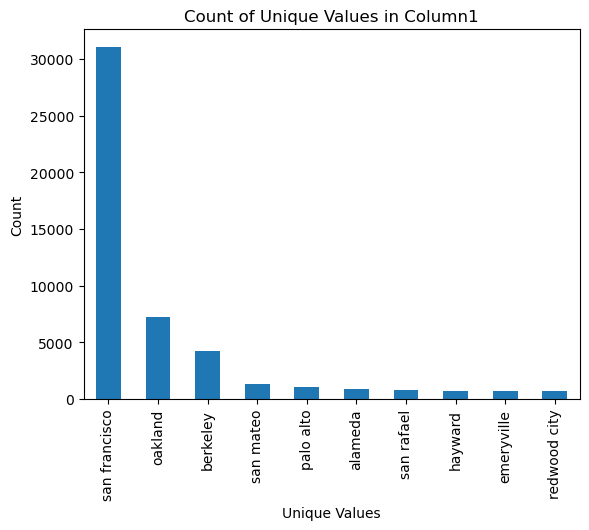

In [24]:
value_counts = m2['City'].value_counts()[0:10]

# Plotting a bar chart
value_counts.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Column1')
plt.show()

In [25]:
oakland_data = m2[m2['City'] == 'oakland']

oakland_data[1:5]

,age,sex,location,body_type,City,State
16,33,m,"oakland, california",fit,oakland,california
24,33,m,"oakland, california",thin,oakland,california
27,22,m,"oakland, california",average,oakland,california
37,25,m,"oakland, california",fit,oakland,california


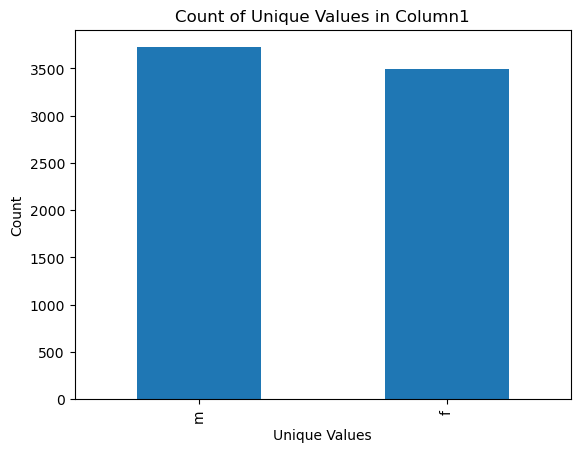

In [26]:
# Get counts of male and female genders in Oklahoma
gender_counts = oakland_data['sex'].value_counts()
gender_counts.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Column1')
plt.show()


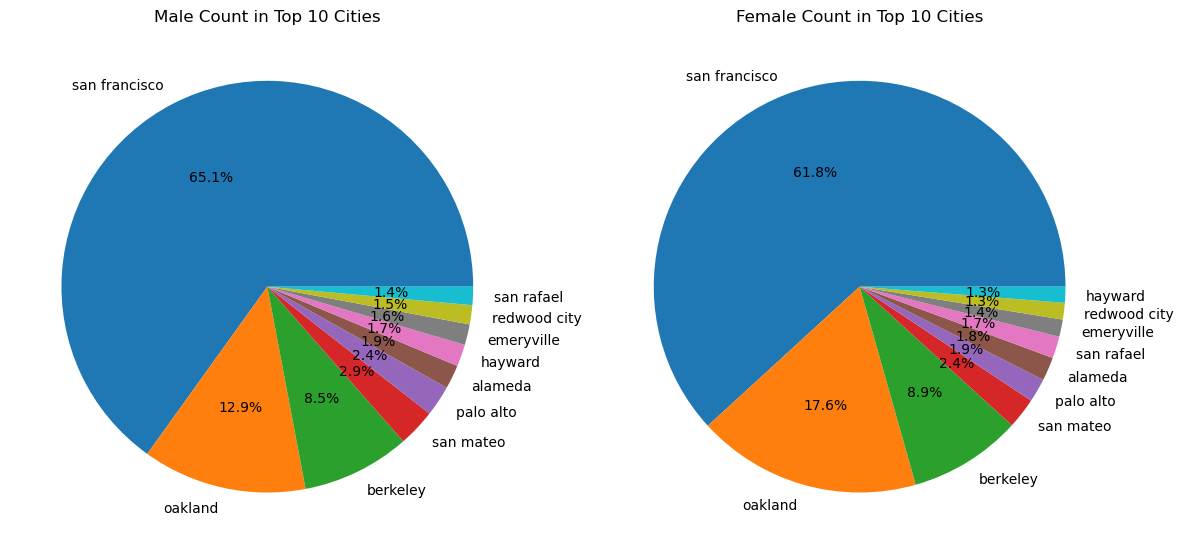

In [27]:
# Get the top 10 cities based on total count
top_cities = m2['City'].value_counts().head(10).index.tolist()

# Filter data for top 10 cities
top_cities_data = m2[m2['City'].isin(top_cities)]

# Get male counts for top 10 cities
male_counts = top_cities_data[top_cities_data['sex'] == 'm']['City'].value_counts()

# Get female counts for top 10 cities
female_counts = top_cities_data[top_cities_data['sex'] == 'f']['City'].value_counts()

# Plot pie chart for male counts in top 10 cities
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(male_counts, labels=male_counts.index, autopct='%1.1f%%')
plt.title('Male Count in Top 10 Cities')

# Plot pie chart for female counts in top 10 cities
plt.subplot(1, 2, 2)
plt.pie(female_counts, labels=female_counts.index, autopct='%1.1f%%')
plt.title('Female Count in Top 10 Cities')

plt.tight_layout()
plt.show()

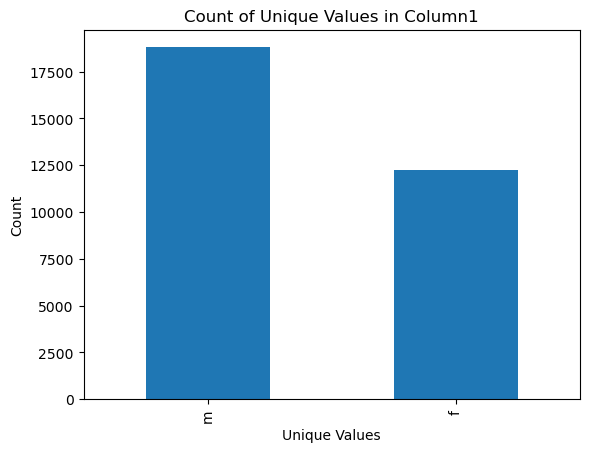

In [28]:
# Get counts of male and female genders in Oklahoma
oakland_data = m2[m2['City'] == 'san francisco']

oakland_data[1:5]
gender_counts = oakland_data['sex'].value_counts()
gender_counts.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Column1')
plt.show()


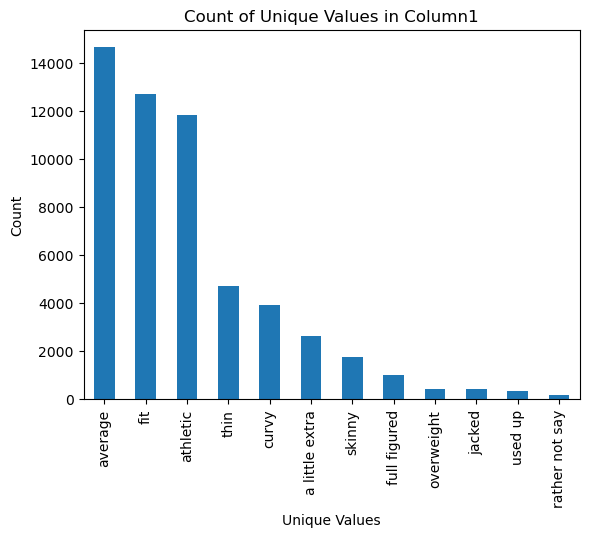

In [29]:
body_count_val  = m2['body_type'].value_counts()
body_count_val.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Column1')
plt.show()


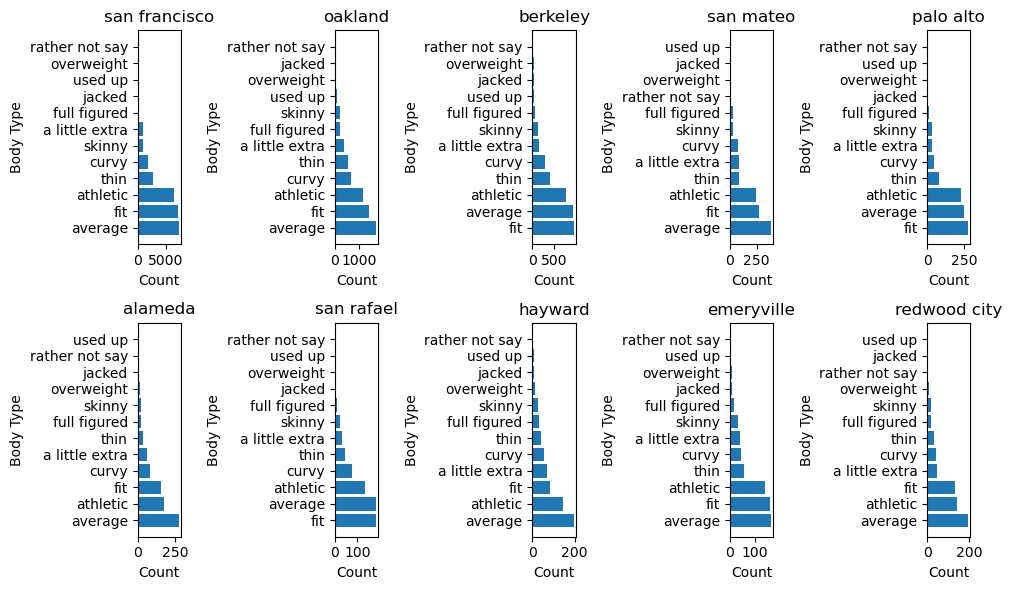

In [30]:
top_locations = m2['City'].value_counts().head(10).index.tolist()

# Filter data for top 10 locations
top_locations_data = m2[m2['City'].isin(top_locations)]

# Plotting the distribution of body types within top 10 locations
plt.figure(figsize=(10, 6))

for i, location in enumerate(top_locations):
    plt.subplot(2, 5, i+1)  # Creating subplots
    location_data = top_locations_data[top_locations_data['City'] == location]
    body_type_counts = location_data['body_type'].value_counts()
    plt.barh(body_type_counts.index, body_type_counts.values)
    plt.xlabel('Count')
    plt.ylabel('Body Type')
    plt.title(location)

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Get top 10 locations based on frequency
top_locations = m2['City'].value_counts().head(10).index.tolist()

# Filter the data for top 10 locations
df_top_locations = m2[m2['City'].isin(top_locations)].copy()  # Make a copy to avoid SettingWithCopyWarning

# Encoding categorical variables
le = LabelEncoder()
df_top_locations['body_type'] = le.fit_transform(df_top_locations['body_type'])
df_top_locations['City_encoded'] = le.fit_transform(df_top_locations['City'])
df_top_locations['sex'] = le.fit_transform(df_top_locations['sex'])

# Splitting the data into features (X) and target variable (y)
X = df_top_locations[['age', 'City_encoded', 'sex']]
y = df_top_locations['body_type']

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model (K-Nearest Neighbors Classifier)
model = KNeighborsClassifier(n_neighbors=3)

# Training the model on data from top 10 locations
model.fit(X_train, y_train)

# Mapping encoded numbers back to locations
location_mapping = dict(zip(le.transform(le.classes_), le.classes_))

# Displaying number-to-location mapping for top 10 cities
for number, location in location_mapping.items():
    if location in top_locations:
        original_location = location_mapping[number]
        print(f"Number {number} corresponds to location: {original_location}")


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Get top 10 locations based on frequency
top_locations = m2['City'].value_counts().head(10).index.tolist()

# Filter the data for top 10 locations
df_top_locations = m2[m2['City'].isin(top_locations)].copy()

# Encoding categorical variables
le = LabelEncoder()
df_top_locations['body_type'] = le.fit_transform(df_top_locations['body_type'])
df_top_locations['City_encoded'] = le.fit_transform(df_top_locations['City'])
df_top_locations['sex'] = le.fit_transform(df_top_locations['sex'])

# Store mapping of encoded labels to original city names
city_encoding_mapping = dict(zip(df_top_locations['City_encoded'], df_top_locations['City']))

# Splitting the data into features (X) and target variable (y)
X = df_top_locations[['age', 'City_encoded', 'sex']]
y = df_top_locations['body_type']

# Creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the model (K-Nearest Neighbors Classifier)
model = KNeighborsClassifier(n_neighbors=3)

# Training the model on data from top 10 locations
model.fit(X_train, y_train)

# Displaying number-to-location mapping for top 10 cities
for encoded_label in range(10):  # Assuming 10 encoded labels for top 10 cities
    original_location = city_encoding_mapping.get(encoded_label)
    if original_location:
        print(f"Encoded label {encoded_label} corresponds to location: {original_location}")


Encoded label 0 corresponds to location: alameda
Encoded label 1 corresponds to location: berkeley
Encoded label 2 corresponds to location: emeryville
Encoded label 3 corresponds to location: hayward
Encoded label 4 corresponds to location: oakland
Encoded label 5 corresponds to location: palo alto
Encoded label 6 corresponds to location: redwood city
Encoded label 7 corresponds to location: san francisco
Encoded label 8 corresponds to location: san mateo
Encoded label 9 corresponds to location: san rafael


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Select top 10 cities from the 'City' column
top_cities = m2['City'].value_counts().head(10).index.tolist()

# Filter the data for top 10 cities
df_top_cities = m2[m2['City'].isin(top_cities)].copy()

# Encoding categorical variables
le_city = LabelEncoder()
le_body_type = LabelEncoder()
le_sex = LabelEncoder()

df_top_cities['City_encoded'] = le_city.fit_transform(df_top_cities['City'])
df_top_cities['body_type_encoded'] = le_body_type.fit_transform(df_top_cities['body_type'])
df_top_cities['sex_encoded'] = le_sex.fit_transform(df_top_cities['sex'])

# Features and target variable
X = df_top_cities[['City_encoded', 'age', 'sex_encoded']]
y = df_top_cities['body_type_encoded']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the K-Nearest Neighbors Classifier model
model = KNeighborsClassifier(n_neighbors=3)

# Training the model
model.fit(X_train, y_train)

# Input values for prediction
input_city = 7  # Provide the city name here
input_age = 30  # Provide the age here
input_sex = 1  # Provide the sex here

# Encoding input city and sex
# input_city_encoded = le_city.transform([input_city])[0]
# input_sex_encoded = le_sex.transform([input_sex])[0]

# Predicting body type for the input
prediction = model.predict([[input_city, input_age, input_sex]])

# Convert predicted label back to original body type
predicted_body_type = le_body_type.inverse_transform(prediction)
print("Predicted body type:", predicted_body_type)


Predicted body type: ['athletic']


/Users/bhargavsaibhuvanagiri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [35]:
df_top_locations[1:5]

,age,sex,location,body_type,City,State,City_encoded
2,38,1,"san francisco, california",10,san francisco,california,7
3,23,1,"berkeley, california",10,berkeley,california,1
4,29,1,"san francisco, california",1,san francisco,california,7
5,29,1,"san francisco, california",2,san francisco,california,7


In [36]:

#model2 input age group-5
#gender-2
#orientation -2
#for each class we get their respective data
#see essay9
#and get frequent words for that subset

In [37]:
# Define the age ranges and corresponding values
age_ranges = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

# Function to map age to the specified ranges
def bucketize_age(age):
    for key in sorted(age_ranges.keys(), reverse=True):
        if age >= key:
            return age_ranges[key]

# Apply the bucketize_age function to create the new column
cupid_data['bucketized_age'] = cupid_data['age'].apply(bucketize_age)


In [38]:
main_model = cupid_data[['age','bucketized_age','sex','job','essay9','orientation']]

In [39]:
main_model[1:5]

,age,bucketized_age,sex,job,essay9,orientation
1,35,35-44,m,hospitality / travel,NaN,straight
2,38,35-44,m,NaN,"you are bright, open, intense, silly, ironic, ...",straight
3,23,18-24,m,student,you feel so inclined.,straight
4,29,25-34,m,artistic / musical / writer,NaN,straight


In [40]:
copy_model = main_model

In [41]:
copy_model.dropna(inplace=True)

/var/folders/0v/zwq30gqn6zv99xpkxv2fzs6w0000gn/T/ipykernel_68803/4262587745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_model.dropna(inplace=True)


In [42]:
copy_model.head()

,age,bucketized_age,sex,job,essay9,orientation
0,22,18-24,m,transportation,you want to be swept off your feet! you are ti...,straight
3,23,18-24,m,student,you feel so inclined.,straight
5,29,25-34,m,computer / hardware / software,you're awesome.,straight
9,37,35-44,m,student,you can rock the bells,straight
11,28,25-34,m,banking / financial / real estate,"if you know who you are, who you want, where y...",straight


In [43]:
copy_model.describe()

,age
count,41762.000000
mean,32.503592
std,9.513239
min,18.000000
25%,26.000000
50%,30.000000
75%,37.000000
max,69.000000


In [44]:
#now drop orienation gay
# now job / --> list of jobs.
#data preprocessing done.
# now frequent pattern mining apriori
# based on age and gender it should give occupation rules.

In [45]:
copy_model = copy_model[copy_model['orientation']=='straight']

In [46]:
copy_model.describe()

,age
count,35729.000000
mean,32.706961
std,9.558927
min,18.000000
25%,26.000000
50%,30.000000
75%,37.000000
max,69.000000


In [47]:
copy_model['job'] = copy_model['job'].apply(lambda x: x.split('/') if '/' in str(x) else [x])

/var/folders/0v/zwq30gqn6zv99xpkxv2fzs6w0000gn/T/ipykernel_68803/3319278889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_model['job'] = copy_model['job'].apply(lambda x: x.split('/') if '/' in str(x) else [x])


In [48]:
copy_model[1:10]

,age,bucketized_age,sex,job,essay9,orientation
3,23,18-24,m,[student],you feel so inclined.,straight
5,29,25-34,m,"[computer , hardware , software]",you're awesome.,straight
9,37,35-44,m,[student],you can rock the bells,straight
11,28,25-34,m,"[banking , financial , real estate]","if you know who you are, who you want, where y...",straight
14,29,25-34,f,[other],...you genuinely think we'd be a good match.,straight
16,33,25-34,m,"[entertainment , media]",you want to help me assemble ikea stuff and/or...,straight
17,26,25-34,f,"[banking , financial , real estate]",you're interested? and you also thought ophel...,straight
18,31,25-34,m,"[medicine , health]","because i'll try to write back, and it's hard ...",straight
19,33,25-34,m,"[science , tech , engineering]",you wanna meet up.,straight


In [56]:
import pandas as pd

def load_custom_dataset(data_frame):
    """Process the custom dataset to create transaction data."""
    transactions = []
    for index, row in data_frame.iterrows():
        transaction = []
        transaction.append(f"sex={row['sex']}")
        transaction.append(f"bucketized_age={row['bucketized_age']}")
        # Assuming the column 'jobs' contains lists of jobs
        for job in row['job']:
            transaction.append(f"job={job}")
        transactions.append(transaction)
    
    return transactions


# Generate transactions for 'copy_model' DataFrame
transactions_copy_model = load_custom_dataset(copy_model)

# Test the transactions
print(transactions_copy_model[1:5])  # This should print the first transaction as a frozenset
print(len(transactions_copy_model))  # This should print the total number of transactions


[['sex=m', 'bucketized_age=18-24', 'job=student'], ['sex=m', 'bucketized_age=25-34', 'job=computer ', 'job= hardware ', 'job= software'], ['sex=m', 'bucketized_age=35-44', 'job=student'], ['sex=m', 'bucketized_age=25-34', 'job=banking ', 'job= financial ', 'job= real estate']]
35729


In [58]:
copy_model_fp = copy_model[['bucketized_age','sex','job']]
copy_model_fp[1:5]

,bucketized_age,sex,job
3,18-24,m,[student]
5,25-34,m,"[computer , hardware , software]"
9,35-44,m,[student]
11,25-34,m,"[banking , financial , real estate]"


In [66]:
# Explode rows based on the 'job' column
new_df = copy_model_fp.explode('job').reset_index(drop=True)

new_df


,bucketized_age,sex,job
0,18-24,m,transportation
1,18-24,m,student
2,25-34,m,computer
3,25-34,m,hardware
4,25-34,m,software
...,...,...,...
76765,18-24,m,media
76766,35-44,m,construction
76767,35-44,m,craftsmanship
76768,25-34,m,medicine


In [67]:
def fp_growth(data,sup):
    dataset = data.values.tolist()
    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    x = fpgrowth(df, min_support=sup, use_colnames=True)
    y = x.values.tolist()
    tup_dict = {tuple(i[1]):i[0] for i in y}
    for i,j in tup_dict.items():
        print("{} -> Support = {}".format(i,j))
    return tup_dict

In [72]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

# Function to mine frequent itemsets using FP-Growth
def fp_growth(data, sup):
    dataset = data.values.tolist()
    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = fpgrowth(df, min_support=sup, use_colnames=True)
    
    # Convert frequent itemsets to a list of tuples
    frequent_itemsets_list = frequent_itemsets.values.tolist()
    
    # Create dictionaries to store itemsets of different lengths
    length_1 = {}
    length_2 = {}
    length_3 = {}

    # Iterate through frequent itemsets and categorize by length
    for itemset in frequent_itemsets_list:
        items = itemset[1]
        length = len(items)
        if length == 1:
            length_1[tuple(items)] = itemset[0]
        elif length == 2:
            length_2[tuple(items)] = itemset[0]
        elif length == 3:
            length_3[tuple(items)] = itemset[0]

    # Print itemsets of length 1
    print("Itemsets of length 1:")
    for itemset, support in length_1.items():
        print("{} -> Support = {}".format(itemset, support))

    # Print itemsets of length 2
    print("\nItemsets of length 2:")
    for itemset, support in length_2.items():
        print("{} -> Support = {}".format(itemset, support))

    # Print itemsets of length 3
    print("\nItemsets of length 3:")
    for itemset, support in length_3.items():
        print("{} -> Support = {}".format(itemset, support))

    return length_1, length_2, length_3

In [76]:
itemsets = fp_growth(new_df,0.001)

Itemsets of length 1:
('m',) -> Support = 0.642112804480917
('18-24',) -> Support = 0.14338934479614432
('transportation',) -> Support = 0.003438843298163345
('student',) -> Support = 0.04048456428292302
('25-34',) -> Support = 0.5273153575615475
('computer ',) -> Support = 0.043636837306239414
(' hardware ',) -> Support = 0.043636837306239414
(' software',) -> Support = 0.043636837306239414
('35-44',) -> Support = 0.21369024358473362
('banking ',) -> Support = 0.019786374886023188
(' financial ',) -> Support = 0.019786374886023188
(' real estate',) -> Support = 0.019786374886023188
('f',) -> Support = 0.357887195519083
('other',) -> Support = 0.06738309235378404
('entertainment ',) -> Support = 0.02101081151491468
(' media',) -> Support = 0.02101081151491468
('medicine ',) -> Support = 0.031639963527419566
(' health',) -> Support = 0.031639963527419566
('science ',) -> Support = 0.04661977334896444
(' tech ',) -> Support = 0.04661977334896444
(' engineering',) -> Support = 0.046619773

In [ ]:
def create_initial_candidates(dataset):
    """Generate the initial candidates."""
    candidates = set()
    for transaction in dataset:
        for item in transaction:
            candidates.add(frozenset([item]))
    return candidates
can = create_initial_candidates(transactions_copy_model)

In [ ]:
print(can)

In [ ]:
def compute_support(dataset, candidates):
    "Compute the support for candidates."
    count = {} #Creating a dictionary to store the support of the unique itemset in the database.
    for transaction in dataset:
        for candidate in candidates:
            if candidate.issubset(transaction):
                count[candidate] = count.get(candidate, 0) + 1# if the candidate intialize the count with 0 and add otherwise add 1 to the already existing count.
    return count

In [ ]:
sup = compute_support(transactions_copy_model,can)
print(sup)

In [ ]:
def filter_candidates(dataset, candidates, min_support):
    """Filter out candidates that don't meet the minimum support."""
    count = compute_support(dataset, candidates) #Computing support
    frequent_items = {k for k, v in count.items() if v / len(dataset) >= min_support} #Filtering if the given count of the itemset is frequent or not.
    
    # Only keep support data for frequent items
    support = {k: v / len(dataset) for k, v in count.items() if k in frequent_items}#Extracting itemsets support that are frequent and keeping a new dictionary.
    
    return frequent_items, support


In [ ]:
filtered = filter_candidates(transactions_copy_model,can,0.05)

In [ ]:
def generate_next_candidates(frequent_items, k):
    """Generate the next candidates."""
    next_candidates = set() # get the unique next_candidates
    items = [item for item in frequent_items] #getting evry itemset from the immutable frozenset
    for i in range(len(items)):
        for j in range(i + 1, len(items)):
            merged = items[i].union(items[j]) # merging the ith itemset from the i+1th itemset to last itemset this make sures every cobination of itemset is produced.
            if len(merged) == k: #if teh merge is equal to given length since sometimes union of two itemsets may go up than the required length.
                next_candidates.add(merged) #add it 
    return next_candidates


In [ ]:
two_itemset = generate_next_candidates(filtered[0],2)
two_itemset

In [ ]:
def apriori(dataset, min_support=0.001):
    """Apply the Apriori algorithm."""
    dataset = [set(transaction) for transaction in dataset] #Getting unique itemsets
    candidates = create_initial_candidates(dataset) #1-length itemsets
    k = 2 #Foe genearating next candidates
    current_frequent_items, support_data = filter_candidates(dataset, candidates, min_support) #Filtering current candidates
    all_frequent_items = [current_frequent_items] # Getting just frequent without thier support data

    while current_frequent_items: #if frequnet itemsets exists of the length k
        next_candidates = generate_next_candidates(current_frequent_items, k) #Generate next candidates
        current_frequent_items, current_support_data = filter_candidates(dataset, next_candidates, min_support) #filter
        support_data.update(current_support_data) #Update the support dictionary update is like appending in list we need to store all the support of all the candidates which are frequent.
        all_frequent_items.append(current_frequent_items) # append the list of newly generated itemsets.
        k += 1 # going to next length

    return all_frequent_items, support_data # get all the frequeent itemsets of all possible length.


In [ ]:
dataset = load_custom_dataset(copy_model)
frequent_itemsets, support_data = apriori(dataset, min_support=0.2)
print(f"Frequent Itemsets: {frequent_itemsets}")
print(f"Support Data: {support_data}")

In [ ]:
len(frequent_itemsets)

In [ ]:
frequent_itemsets[0] 

In [ ]:
frequent_itemsets[1] 

In [ ]:
frequent_itemsets[2] 

In [99]:
c_mod = main_model

In [100]:
c_mod.describe()

,age
count,41762.000000
mean,32.503592
std,9.513239
min,18.000000
25%,26.000000
50%,30.000000
75%,37.000000
max,69.000000


In [101]:
c_mod['bucketized_age'].unique()

array(['18-24', '25-34', '35-44', '45-49', '50-55', '56+'], dtype=object)

In [193]:
filtered_data = c_mod[(c_mod['bucketized_age'] == '56+') & (c_mod['sex'] == 'm')]


In [194]:
filtered_data.describe()

,age
count,763.000000
mean,60.444299
std,3.575284
min,56.000000
25%,57.000000
50%,60.000000
75%,63.000000
max,69.000000


In [195]:
filtered_data

,age,bucketized_age,sex,job,essay9,orientation
213,58,56+,m,law / legal services,...you'd like to reach out to talk... whatever...,straight
348,60,56+,m,other,... you sense compatibility or complementarity...,straight
390,57,56+,m,retired,at home working on my computer or at the local...,straight
398,60,56+,m,banking / financial / real estate,you feel the urge,straight
415,59,56+,m,science / tech / engineering,"you are simple, romantic, honest, genuine, a o...",straight
...,...,...,...,...,...,...
59392,58,56+,m,other,you are willing to be truthful with me and honest,straight
59403,57,56+,m,medicine / health,you should message me if you like what you've ...,straight
59482,57,56+,m,other,you can see past the rather severe first impre...,straight
59534,60,56+,m,science / tech / engineering,"if you are open minded, physically active, lik...",straight


In [196]:
filtered_data = filtered_data[filtered_data['orientation']=='straight']

In [197]:
filtered_data

,age,bucketized_age,sex,job,essay9,orientation
213,58,56+,m,law / legal services,...you'd like to reach out to talk... whatever...,straight
348,60,56+,m,other,... you sense compatibility or complementarity...,straight
390,57,56+,m,retired,at home working on my computer or at the local...,straight
398,60,56+,m,banking / financial / real estate,you feel the urge,straight
415,59,56+,m,science / tech / engineering,"you are simple, romantic, honest, genuine, a o...",straight
...,...,...,...,...,...,...
59392,58,56+,m,other,you are willing to be truthful with me and honest,straight
59403,57,56+,m,medicine / health,you should message me if you like what you've ...,straight
59482,57,56+,m,other,you can see past the rather severe first impre...,straight
59534,60,56+,m,science / tech / engineering,"if you are open minded, physically active, lik...",straight


In [198]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk import pos_tag

# Sample DataFrame 'copy_model' with 'bucketized_age' and 'desired_person' columns
# data = {
#     'bucketized_age': ['18-24', '25-34', '25-34', '35-44', '18-24'],
#     'desired_person': [
#         "if you know who you are, who you want, where y.",
#         "Looking for someone adventurous and fun-loving.",
#         "I want a person who is intelligent and kind-hearted.",
#         "Searching for a mature and understanding partner.",
#         "Hoping to find someone passionate and creative."
#     ]
#     # Add other columns if present in your DataFrame
#}

#copy_model = pd.DataFrame(data)

# Select a specific bucketized_age group
# selected_age_group = '25-34'
# selected_data = copy_model[copy_model['bucketized_age'] == selected_age_group]

# Text preprocessing
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenize words
    words = word_tokenize(text.lower())
    # Get parts of speech for each word
    tagged_words = pos_tag(words)
    # Keep only nouns, adjectives, verbs, and adverbs; lemmatize words
    words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_words
             if get_wordnet_pos(tag) in ('n', 'a', 'v', 'r')]
    # Remove stop words and single-character tokens
    words = [word for word in words if word.isalpha() and word not in stop_words and len(word) > 1]
    return words

# Function to get WordNet POS tag from Penn Treebank POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'  # Adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # Verb
    elif treebank_tag.startswith('N'):
        return 'n'  # Noun
    elif treebank_tag.startswith('R'):
        return 'r'  # Adverb
    else:
        return ''   # Other parts of speech

# Apply preprocessing and extract words for desired_person column in the selected age group
words_list = []
for index, row in filtered_data.iterrows():
    words = preprocess_text(row['essay9'])
    words_list.extend(words)

# Get the most common words
word_freq = Counter(words_list)
most_common_words = word_freq.most_common(200)

#print("Most common words for the age group", selected_age_group)
print(most_common_words)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhargavsaibhuvanagiri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bhargavsaibhuvanagiri/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bhargavsaibhuvanagiri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('want', 204), ('like', 159), ('know', 121), ('good', 120), ('look', 119), ('love', 115), ('life', 95), ('get', 86), ('make', 81), ('woman', 79), ('meet', 77), ('think', 75), ('someone', 75), ('enjoy', 72), ('relationship', 70), ('fun', 68), ('interest', 65), ('go', 62), ('find', 60), ('interested', 59), ('see', 58), ('feel', 56), ('share', 56), ('man', 55), ('thing', 55), ('friend', 55), ('time', 55), ('talk', 49), ('profile', 49), ('open', 47), ('great', 47), ('sense', 45), ('conversation', 44), ('something', 44), ('guy', 42), ('well', 40), ('say', 40), ('new', 40), ('need', 40), ('live', 39), ('take', 39), ('laugh', 38), ('really', 38), ('together', 36), ('partner', 34), ('work', 33), ('message', 33), ('write', 33), ('mind', 32), ('interesting', 32), ('person', 31), ('people', 31), ('please', 31), ('also', 31), ('kind', 30), ('humor', 30), ('long', 30), ('day', 30), ('way', 29), ('smart', 28), ('read', 28), ('honest', 27), ('fit', 27), ('come', 27), ('intelligent', 26), ('appreciat

In [210]:
age_values = ['18-24', '25-34', '35-44', '45-49', '50-55', '56+']
gender_values = ['f', 'm']
important_words = [['adventure','good','message','think','love','fun','new','friend','music','talk','people','interested','enjoy','conversation','read','interesting','laugh',]
                  ,['like','message','talk','look','fun','new','love','friend','conversation','hang','cool','say','read','awesome','girl','adventure','chat']
                  ,['think','love','intrested','friend','time','humor','relationship','honest','tall','serious','active','awesome','intelligent','work','together','travel']
                  ,['think','talk','cool','adventure','work','real','honest','smart','pretty','explore']
                  ,['relationship','enjoy','smart','date','read','share','passionate','intelligent','curious','music','family','appreciate']
                  ,['good','love','open','great','relationship','enjoy','serious','intelligent','partner','share']
                  ,['physical','afraid','creative','family','independent','serious','available','emotional','passionate','healthy','humor','willing']
                  ,['fun','conversation','appreciate','travel','experience','movie','passion','attractive','sexy','spirit','connection','desire']
                  ,['creative','integrity','spiritual','available','attractive','romantic','curious','believe','intelligent']
                  ,['sexy','spirit','desire','dance','strong','serious','healthy','appreciate','experience','kind']
                  ,['family','single','attractive','compassionate','young','creative','honest','curious']
                  ,['soul','kiss','lover','respect','respond','playful','physical','positive','passion','affectionate','child','desire']]


In [211]:
len(imporatent_words)

12

In [212]:
data = {
    'Age': ['18-24','18-24','25-34','25-34','35-44','35-44','45-49','45-49','50-55','50-55','56+','56+'],
    'Gender': ['f', 'm','f', 'm','f', 'm','f', 'm','f', 'm','f', 'm'],
    'Important_Words': important_words
}
ok_cupid_words = pd.DataFrame(data)
ok_cupid_words




,Age,Gender,Important_Words
0,18-24,f,"[adventure, good, message, think, love, fun, n..."
1,18-24,m,"[like, message, talk, look, fun, new, love, fr..."
2,25-34,f,"[think, love, intrested, friend, time, humor, ..."
3,25-34,m,"[think, talk, cool, adventure, work, real, hon..."
4,35-44,f,"[relationship, enjoy, smart, date, read, share..."
5,35-44,m,"[good, love, open, great, relationship, enjoy,..."
6,45-49,f,"[physical, afraid, creative, family, independe..."
7,45-49,m,"[fun, conversation, appreciate, travel, experi..."
8,50-55,f,"[creative, integrity, spiritual, available, at..."
9,50-55,m,"[sexy, spirit, desire, dance, strong, serious,..."


In [214]:
ok_cupid_words.to_csv('ok_cupid_words.csv', index=False)